# Setup

In [2]:
# Get CIFAR-10 dataset in .png format
!wget http://pjreddie.com/media/files/cifar.tgz
!tar xzf cifar.tgz

# Clone ESRGAN repo here
!git clone https://github.com/xinntao/ESRGAN.git
  
# Folders required for loading and storing images 
!mkdir LR 
!mkdir results

# Install Opencv
!pip install opencv-python
!pip install blinker

# Clone Repo
!pip install --user keras-importance-sampling
!git clone https://github.com/idiap/importance-sampling.git
  
# Convert the repo into a module for usage in the notebook
!touch importance-sampling/__init__.py
!touch importance-sampling/importance_sampling/__init__.py
!touch importance-sampling/examples/__init__.py
!cp -r importance-sampling/* .

# Copy contents of repo for easy usage 
!cp -r importance-sampling/* .

# Clone Repo
!pip install --user keras-importance-sampling
!git clone https://github.com/idiap/importance-sampling.git
  
# Convert the repo into a module for usage in the notebook
!touch importance-sampling/__init__.py
!touch importance-sampling/importance_sampling/__init__.py
!touch importance-sampling/examples/__init__.py
!cp -r importance-sampling/* .

# Copy contents of repo for easy usage 
!cp -r importance-sampling/* 

# Create directory for storage of images
!mkdir train_images/
!mkdir LR/
!mkdir results/

--2019-04-30 05:33:31--  http://pjreddie.com/media/files/cifar.tgz
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/cifar.tgz [following]
--2019-04-30 05:33:31--  https://pjreddie.com/media/files/cifar.tgz
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168584360 (161M) [application/octet-stream]
Saving to: ‘cifar.tgz’

cifar.tgz           100%[===================>] 160.77M  57.6MB/s    in 2.8s    

2019-04-30 05:33:34 (57.6 MB/s) - ‘cifar.tgz’ saved [168584360/168584360]

Cloning into 'ESRGAN'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 191 (delta 0), reused 3 (delta 0), pack-reused 188
Receiving objects: 100% (191/191), 2

# Download Pretrained Models from Drive

In [3]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1mSJ6Z40weL-dnPvi390xDd3uZBCFMeqr'
X = drive.CreateFile({'id': file_id})
X = X.GetContentFile('ESRGAN/models/RRDB_PSNR.pth')

file_id = '1MJFgqXJrMkPdKtiuy7C6xfsU1QIbXEb-'
Y = drive.CreateFile({'id': file_id})
Y = Y.GetContentFile('ESRGAN/models/RRDB_ESRGAN.pth')

     |████████████████████████████████| 993kB 3.4MB/s 


# Imports


In [4]:
# Hack needed to get blinker to work (for some mysterious reson it seems to be give an error)
!pip uninstall blinker
!pip install blinker

import cv2 as cv
import imageio
from PIL import Image
import os
import glob
import numpy as np
from keras.models import load_model
from importance_sampling.layers.normalization import LayerNormalization

Uninstalling blinker-1.4:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/blinker-1.4.dist-info/*
    /usr/local/lib/python3.6/dist-packages/blinker/*
Proceed (y/n)? y
  Successfully uninstalled blinker-1.4


Using TensorFlow backend.


In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!ls gdrive/My\ Drive

 001_0001.jpg
'Appel A.W. - Modern compiler implementation in ML-CUP (1999).pdf'
'(Cambridge Series in Statistical and Probabilistic Mathematics) David Pollard - A User’s Guide to Measure Theoretic Probability-Cambridge University Press (2001).pdf'
'Personal-Data Information Worksheet.gsheet'
 res-net-28-2-1hr-dropout-IS-acc.png
 res-net-28-2-1hr-dropout-IS.h5
 res-net-28-2-1hr-dropout-IS-history.npy
 res-net-28-2-1hr-dropout-IS-loss.png
 res-net-28-2-1hr-dropout-noIS-acc.png
 res-net-28-2-1hr-dropout-noIS.h5
 res-net-28-2-1hr-dropout-noIS-history.npy
 res-net-28-2-1hr-dropout-noIS-loss.png
 res-net-28-2-1hr-nodropout-IS-acc.png
 res-net-28-2-1hr-nodropout-IS.h5
 res-net-28-2-1hr-nodropout-IS-history.npy
 res-net-28-2-1hr-nodropout-IS-loss.png
 res-net-28-2-1hr-nodropout-noIS-acc.png
 res-net-28-2-1hr-nodropout-noIS.h5
 res-net-28-2-1hr-nodropout-noIS-history.npy
 res-net-28-2-1hr-nodropout-noIS-loss.png
 resume-2.pdf
 resume.pdf
'S. Boyd, L. Vandenberghe - Convex Optimization-Cambridg

In [6]:
model = load_model('gdrive/My Drive/res-net-28-2-1hr-dropout-IS.h5', custom_objects = {'LayerNormalization' : LayerNormalization})

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
#im = cv.imread('cifar/test/0_cat.png')
#cv2.imwrite('new.jpg', im)

!cp cifar/test/0_cat.png small_cat.png
!ls -l small_cat.png
im = Image.open('small_cat.png')
#im.save('new.jpg')
#!ls -l new.jpg
im.thumbnail((8,8), Image.BICUBIC)
im.save('small_cat.png')
!ls -l small_cat.png
im = cv.imread('small_cat.png')
print(im.shape)
#cv.imwrite("compressed.png", im, [int(cv.IMWRITE_PNG_COMPRESSION), 9])
'''
encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), 5]
result, encimg = cv2.imencode('.jpg', im, encode_param)
print(encimg.shape)
cv2.imwrite('new.jpg', encimg)

im1 = Image.open('new.jpg')
IMAGE_10 = os.path.join('new.jpg')
im1.save(IMAGE_10,"JPEG", quality=50)
#im10 = Image.open(IMAGE_10)

!ls -l new.jpg

im = Image.open('new.jpg')
im.save('new.png')
!ls -l new.png

import matplotlib.image as img
image = img.imread('new.png')
image.shape
'''
!rm LR/*
!cp small_cat.png LR/
!cp  cifar/test/0_cat.png LR/

-rw-r--r-- 1 root root 3187 Apr 26 22:30 small_cat.png
-rw-r--r-- 1 root root 268 Apr 26 22:30 small_cat.png
(8, 8, 3)


In [0]:

labels = []
acc = 0
label_mapping = {'airplane':0, 'automobile':1, 'bird': 2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}
for im_path in glob.glob("cifar/test/*.png"):
  split = im_path.split('/')
  split = split[-1].split('_')
  label = split[-1].split('.')[0]
  
  # Convert label to integer
  labels.append(label_mapping[label])
  
  im = cv.imread(im_path)/np.max(im)
  
  # TODO : nORMALIZE AND DO zca whitening()imort this from the repo
  '''
  # Normalize to [0, 1]
        X_train = X_train.astype(np.float32) / X_train.max()
        X_test = X_test.astype(np.float32) / X_test.max()
        '''
  pred = model.predict(np.array([im]))
  if np.argmax(pred) == label_mapping[label]:
    acc += 1
print(acc/10000)
labels = np.array(labels)

KeyboardInterrupt: ignored

In [0]:
from IPython.display import Image as I
I(filename='LR/small_cat.png') 

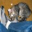

In [0]:
I(filename='LR/0_cat.png')

In [0]:
from keras.datasets import cifar10
x,y = cifar10.load_data()
print(y[0][0].shape)

Using TensorFlow backend.


(32, 32, 3)


In [0]:
for im_path in glob.glob("path/to/folder/*.png"):
     im = imageio.imread(im_path)
     print(im.shape)
      
pngs = glob('./*.png')

for j in pngs:
    img = cv2.imread(j)
    cv2.imwrite(j[:-3] + 'jpg', img)

In [0]:
!python ESRGAN/test.py ESRGAN/models/RRDB_ESRGAN.pth

Model path ESRGAN/models/RRDB_ESRGAN.pth. 
Testing...
1 small_cat
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/upsampling.py:129: UserWarning: nn.Upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))
2 0_cat


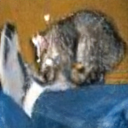

In [0]:
I(filename='results/0_cat_rlt.png')

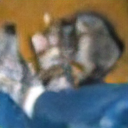

In [0]:
I(filename='results/small_cat_rlt_rlt.png')

(32, 32, 3)


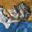

In [0]:

im1 = cv.imread('results/small_cat_rlt.png')
print(im1.shape)
I(filename='results/small_cat_rlt.png')


In [12]:
!ls results/*

results/0_rlt.png      results/25000_rlt.png  results/40000_rlt.png
results/10000_rlt.png  results/25001_rlt.png  results/40001_rlt.png
results/10001_rlt.png  results/25002_rlt.png  results/40002_rlt.png
results/10002_rlt.png  results/25003_rlt.png  results/40003_rlt.png
results/10003_rlt.png  results/25004_rlt.png  results/40004_rlt.png
results/10004_rlt.png  results/25005_rlt.png  results/40005_rlt.png
results/10005_rlt.png  results/25006_rlt.png  results/40006_rlt.png
results/10006_rlt.png  results/25007_rlt.png  results/40007_rlt.png
results/10007_rlt.png  results/25008_rlt.png  results/40008_rlt.png
results/10008_rlt.png  results/25009_rlt.png  results/40009_rlt.png
results/10009_rlt.png  results/2500_rlt.png   results/4000_rlt.png
results/1000_rlt.png   results/25010_rlt.png  results/40010_rlt.png
results/10010_rlt.png  results/25011_rlt.png  results/40011_rlt.png
results/10011_rlt.png  results/25012_rlt.png  results/40012_rlt.png
results/10012_rlt.png  results/25013_rlt.png  res

In [0]:
!cp results/small_cat_rlt.png LR/

In [0]:
!ls LR/*

ls: cannot access 'LR/*': No such file or directory


In [0]:
!ls -l yolo.png
!ls -l cifar/train/0_frog.png

im = Image.open('yolo.png')
im.thumbnail((8,8), Image.BICUBIC)
im.save('yolo.png')
!ls -l yolo.png
im = cv.imread('yolo.png')
print(im.shape)

-rw-r--r-- 1 root root 2665 Apr 30 03:18 yolo.png
-rw-r--r-- 1 1000 1000 3244 Nov 18  2016 cifar/train/0_frog.png
-rw-r--r-- 1 root root 268 Apr 30 03:20 yolo.png
(8, 8, 3)


In [7]:
from importance_sampling.datasets import CIFAR10, ZCAWhitening

ds = CIFAR10()
x_train, y_train = ds.train_data[:]


170500096/170498071 [==============================] - 22s 0us/step


[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


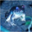

In [0]:
i = 0
cv.imwrite('yolo.png', x_train[i]*255)
print(y_train[i])
from IPython.display import Image as I
I(filename='yolo.png')


In [0]:
def store_in_folder(x_train, Dir, img_size):
  # Un normalize
  x_train = x_train*255
  
  # Write images to 'Dir'
  for i in range(x_train.shape[0]):
    cv.imwrite(Dir + str(i) + '.png', x_train[i]*255)
    
    # Compress images in dir to a smaller size
    im = Image.open(Dir + str(i) + '.png')
    im.thumbnail((img_size, img_size), Image.BICUBIC)
    im.save(Dir + str(i) + '.png')

In [0]:
store_in_folder(ds.train_data[:][0], 'LR/', 8)

In [10]:
!python ESRGAN/test.py ESRGAN/models/RRDB_ESRGAN.pth

Model path ESRGAN/models/RRDB_ESRGAN.pth. 
Testing...
1 8814
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/upsampling.py:129: UserWarning: nn.Upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))
2 24972
3 6389
4 12139
5 12727
6 21428
7 6543
8 35720
9 28505
10 19556
11 25895
12 7373
13 29955
14 28883
15 30208
16 44240
17 16796
18 35712
19 31723
20 7631
21 49122
22 18613
23 9076
24 28486
25 11838
26 10483
27 690
28 46291
29 14212
30 34118
31 48210
32 46140
33 32864
34 18654
35 23767
36 23857
37 5212
38 30643
39 39310
40 49293
41 33065
42 28697
43 5009
44 34639
45 41234
46 10685
47 15444
48 21438
49 31603
50 4676
51 29097
52 10153
53 23385
54 8455
55 713
56 22291
57 46921
58 6246
59 37836
60 24992
61 42065
62 44479
63 46379
64 7508
65 21879
66 24418
67 34215
68 2481
69 26809
70 20429
71 19105
72 7434
73 12282
74 18815
75 9103
76 40627
77 19215
78 12333
79 13393
80 26575
81 

In [11]:
!mkdir gdrive/My\ Drive/upsampled_cifar10/

mkdir: cannot create directory ‘gdrive/My Drive/upsampled_cifar10/’: File exists


In [16]:
def get_results(img_path):
  data = np.zeros((50000,32,32,3))
  
  for im_path in glob.glob(img_path + "*.png"):
    # Files have been named according to index
    idx = im_path.split('/')[-1]
    idx = idx.split('_')[0]
    idx = int(idx)
    print(idx)
    
    im = cv.imread(im_path)
    data[idx] = im
  
  return data

x_train = get_results('results/')
np.save('gdrive/My Drive/upsampled_cifar10/x_train', x_train)
np.save('gdrive/My Drive/upsampled_cifar10/y_train', y_train)

25119
15123
28366
28233
20364
3399
43858
28814
23636
16243
13845
19778
40830
27648
12242
30205
6301
32538
42103
23675
43296
49290
35251
39736
12066
47513
37290
5740
44919
35734
24740
26325
8941
44175
10963
49447
7162
24415
34459
49186
48303
36308
12470
22573
21360
13294
3715
18378
25262
1115
46920
2395
35043
46614
35221
21152
5136
22926
2931
25799
38842
4841
735
17966
41993
9216
10313
4556
25307
43962
28296
45236
12755
2621
8926
17765
28747
27868
31085
2841
40379
5106
2733
20084
17647
44822
42026
36076
36818
33978
24648
4563
43987
31634
21222
27612
7140
42365
27439
9453
17452
45168
16582
31899
4503
42720
5099
28041
44263
6285
46274
21655
39244
48185
8825
16188
720
41941
722
9180
23883
33879
33079
3439
18844
12170
16327
12589
39908
12160
39060
17568
44334
21350
23057
34082
358
46019
8638
11126
692
13916
45182
20125
44439
41051
12853
48929
11781
28144
41965
31817
33127
32620
43760
5665
28407
11559
28469
48225
19752
9779
3946
39261
40532
12357
42609
18505
47918
11693
12656
34168
18767
427